<a href="https://colab.research.google.com/github/Lsaride/64060_lsaride/blob/main/Supply_Chain_Inventory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install libraries if needed
!pip install pandas openpyxl


In [2]:
import pandas as pd
import numpy as np


In [4]:
from google.colab import files
uploaded = files.upload()


Saving Online Retail.xlsx to Online Retail.xlsx


In [14]:
df = pd.read_excel('Online Retail.xlsx', nrows=10000)


In [15]:
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [19]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Drop rows without product codes
df.dropna(subset=['StockCode'], inplace=True)

# Create a Total Sales column
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Convert dates
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Add Month column
df['Month'] = df['InvoiceDate'].dt.to_period('M')


In [17]:
sku_sales = df.groupby('StockCode').agg({
    'TotalSales': 'sum'
}).sort_values(by='TotalSales', ascending=False).reset_index()


In [18]:
sku_sales['CumSales'] = sku_sales['TotalSales'].cumsum()
sku_sales['CumPct'] = 100 * sku_sales['CumSales'] / sku_sales['TotalSales'].sum()


In [20]:
def abc_class(row):
    if row['CumPct'] <= 70:
        return 'A'
    elif row['CumPct'] <= 90:
        return 'B'
    else:
        return 'C'

sku_sales['ABC'] = sku_sales.apply(abc_class, axis=1)


In [21]:
sku_sales.head(10)


,StockCode,TotalSales,CumSales,CumPct,ABC
0,22423,7717.95,7717.95,4.288976,A
1,84029E,3186.63,10904.58,6.059832,A
2,DOT,2938.74,13843.32,7.692932,A
3,79321,2749.78,16593.10,9.221025,A
4,85123A,2600.98,19194.08,10.666427,A
5,22086,2406.87,21600.95,12.003959,A
6,21137,2159.79,23760.74,13.204185,A
7,22752,2005.96,25766.70,14.318926,A
8,21915,1817.82,27584.52,15.329115,A
9,22910,1541.97,29126.49,16.186010,A


In [22]:
sku_turnover = df.groupby('StockCode').agg({
    'Quantity': 'sum'
}).reset_index()

# Estimate average inventory as 50% of quantity sold
sku_turnover['AvgInventory'] = sku_turnover['Quantity'] * 0.5

# Calculate turnover rate
sku_turnover['TurnoverRate'] = sku_turnover['Quantity'] / sku_turnover['AvgInventory']


In [23]:
sku_turnover.head()


,StockCode,Quantity,AvgInventory,TurnoverRate
0,10002,70,35.0,2.0
1,10120,3,1.5,2.0
2,10125,2,1.0,2.0
3,10133,10,5.0,2.0
4,10135,23,11.5,2.0


In [27]:
# Average daily usage
sku_turnover['AvgDailyUsage'] = sku_turnover['Quantity'] / 365

# Assume Lead Time = 14 days, Safety Stock = 20 units
sku_turnover['ReorderPoint'] = (sku_turnover['AvgDailyUsage'] * 14) + 20


In [28]:
sku_turnover[['StockCode','AvgDailyUsage','ReorderPoint']].head()


,StockCode,AvgDailyUsage,ReorderPoint
0,10002,0.191781,22.684932
1,10120,0.008219,20.115068
2,10125,0.005479,20.076712
3,10133,0.027397,20.383562
4,10135,0.063014,20.882192


In [29]:
sku_summary = pd.merge(sku_sales, sku_turnover, on='StockCode')


In [30]:
sku_summary.head()


,StockCode,TotalSales,CumSales,CumPct,ABC,Quantity,AvgInventory,TurnoverRate,AvgDailyUsage,ReorderPoint
0,22423,7717.95,7717.95,4.288976,A,622,311.0,2.0,1.704110,43.857534
1,84029E,3186.63,10904.58,6.059832,A,829,414.5,2.0,2.271233,51.797260
2,DOT,2938.74,13843.32,7.692932,A,6,3.0,2.0,0.016438,20.230137
3,79321,2749.78,16593.10,9.221025,A,602,301.0,2.0,1.649315,43.090411
4,85123A,2600.98,19194.08,10.666427,A,974,487.0,2.0,2.668493,57.358904


In [31]:
sku_summary.to_csv('Inventory_Analysis.csv', index=False)


In [32]:
from google.colab import files
files.download('Inventory_Analysis.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
!pip install matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns


/tmp/ipython-input-34-3944470122.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


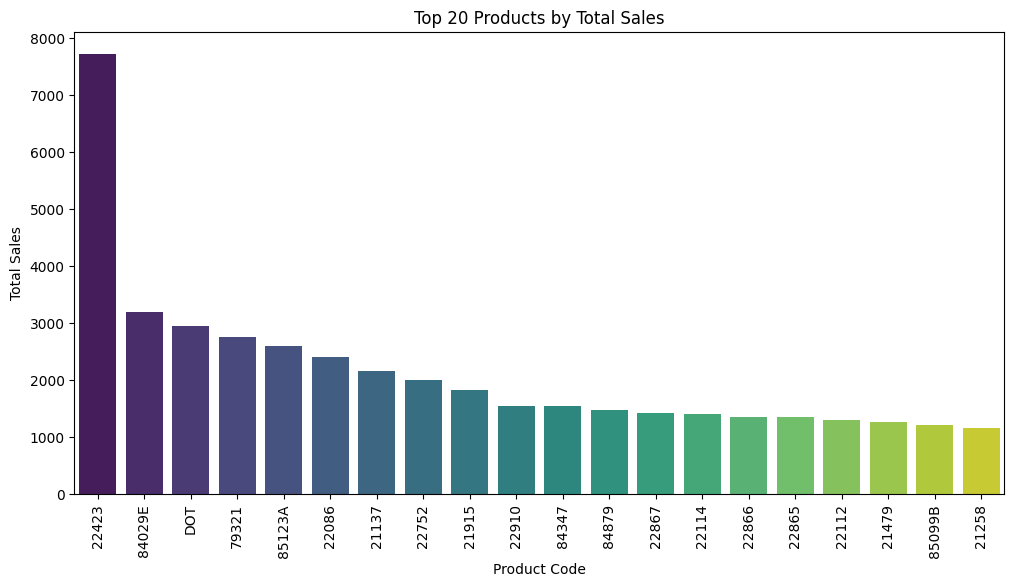

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(
    x='StockCode',
    y='TotalSales',
    data=sku_sales.head(20),
    palette='viridis'
)

plt.xticks(rotation=90)
plt.title('Top 20 Products by Total Sales')
plt.xlabel('Product Code')
plt.ylabel('Total Sales')
plt.show()


/tmp/ipython-input-35-3413973576.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


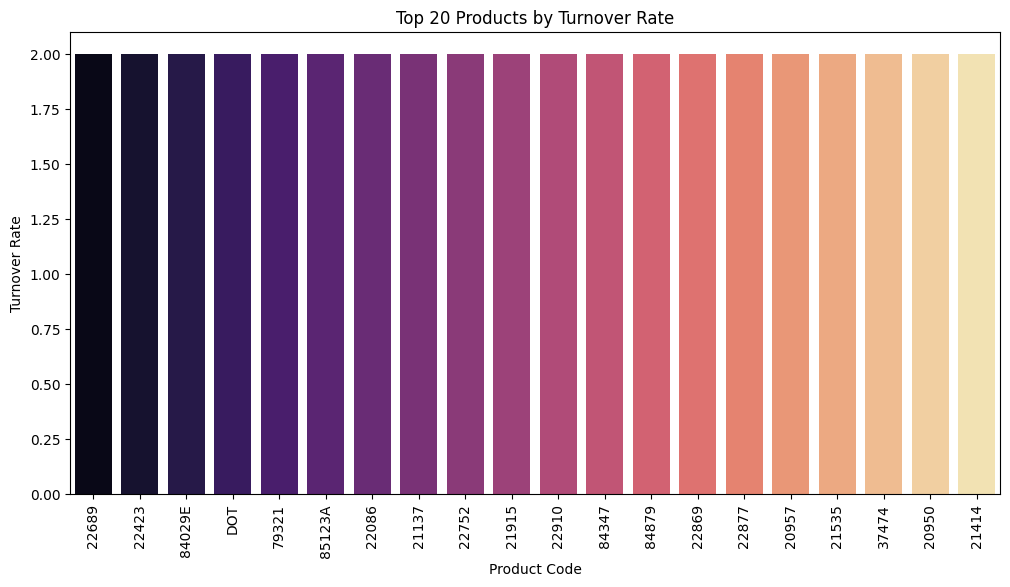

In [35]:
top_turnover = sku_summary.sort_values('TurnoverRate', ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(
    x='StockCode',
    y='TurnoverRate',
    data=top_turnover,
    palette='magma'
)
plt.xticks(rotation=90)
plt.title('Top 20 Products by Turnover Rate')
plt.xlabel('Product Code')
plt.ylabel('Turnover Rate')
plt.show()


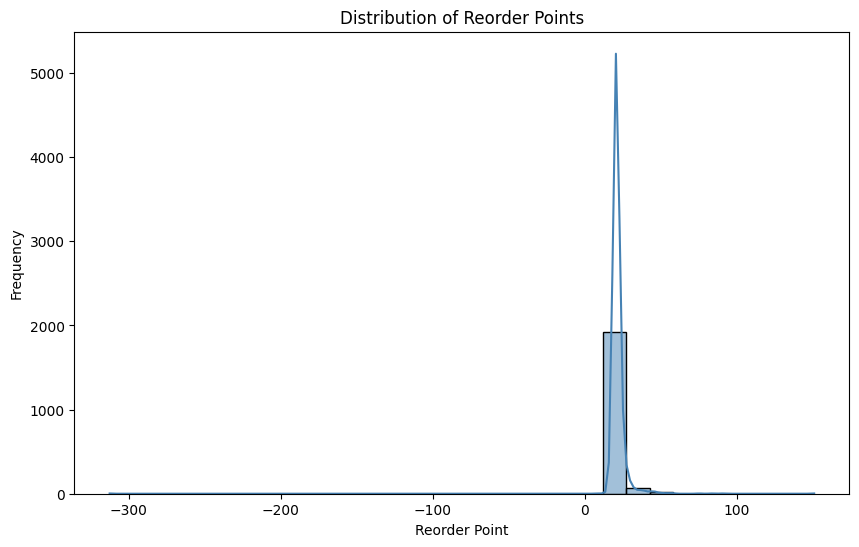

In [36]:
plt.figure(figsize=(10,6))
sns.histplot(
    sku_summary['ReorderPoint'],
    bins=30,
    color='steelblue',
    kde=True
)
plt.title('Distribution of Reorder Points')
plt.xlabel('Reorder Point')
plt.ylabel('Frequency')
plt.show()


In [37]:
!pip install matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns


/tmp/ipython-input-38-3369276021.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


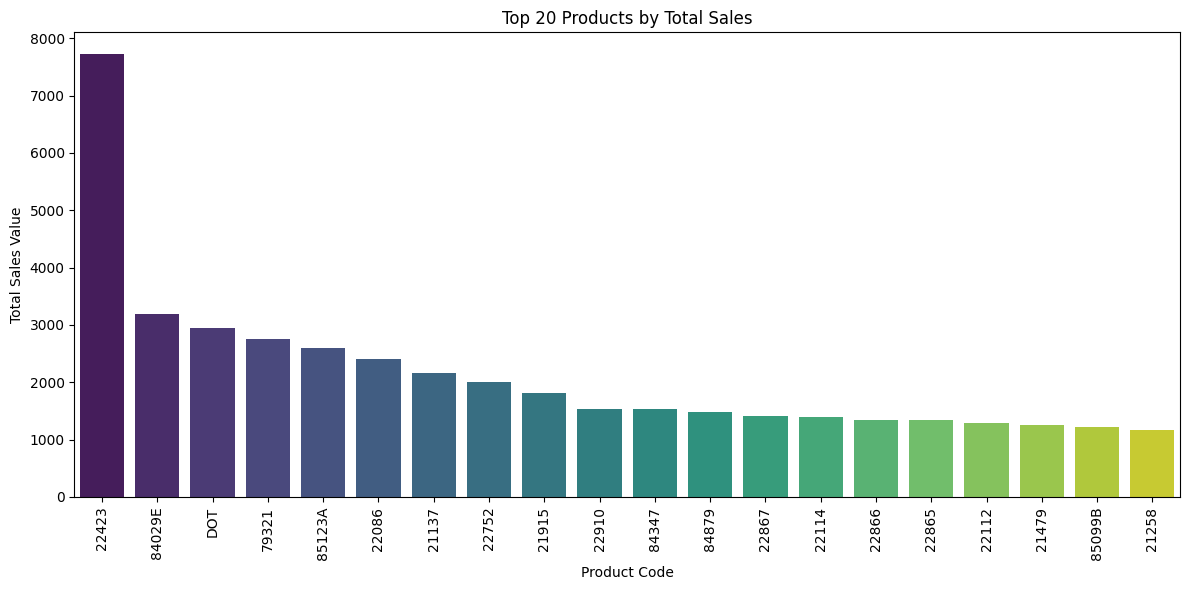

In [38]:
# Sort by TotalSales descending
top_skus = sku_summary.sort_values(by='TotalSales', ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(
    x='StockCode',
    y='TotalSales',
    data=top_skus,
    palette='viridis'
)
plt.title('Top 20 Products by Total Sales')
plt.xlabel('Product Code')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


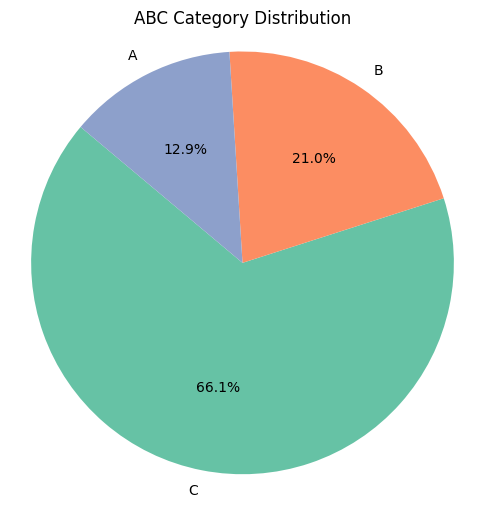

In [39]:
abc_counts = sku_summary['ABC'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    abc_counts,
    labels=abc_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#66c2a5','#fc8d62','#8da0cb']
)
plt.title('ABC Category Distribution')
plt.axis('equal')
plt.show()


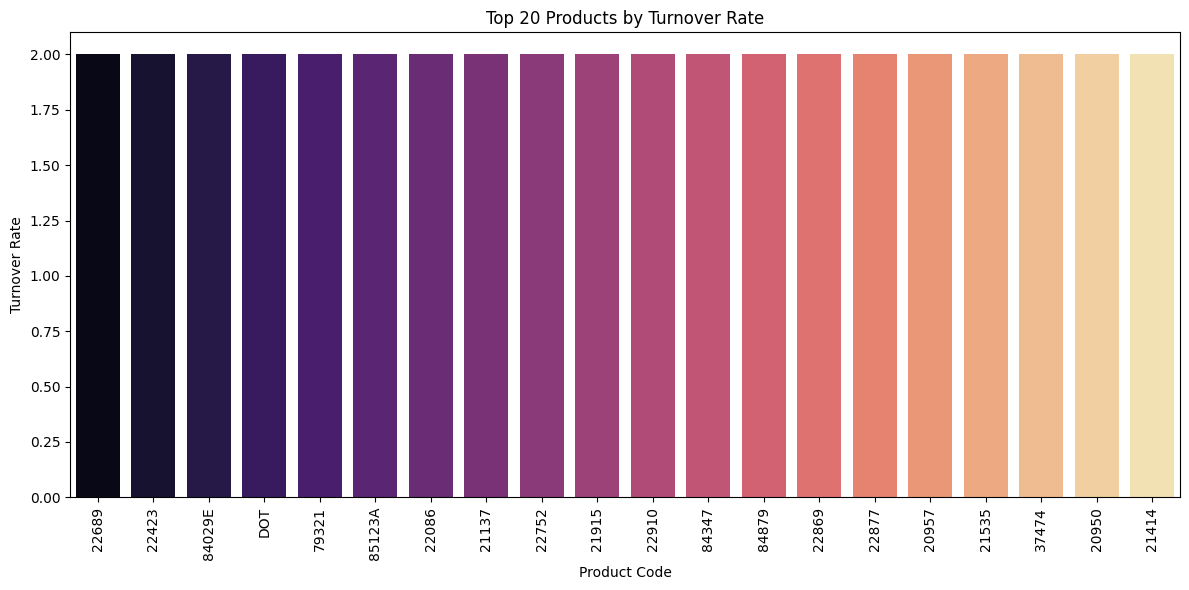

In [40]:
top_turnover = sku_summary.sort_values(by='TurnoverRate', ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(
    x='StockCode',
    y='TurnoverRate',
    data=top_turnover,
    palette='magma'
)
plt.title('Top 20 Products by Turnover Rate')
plt.xlabel('Product Code')
plt.ylabel('Turnover Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


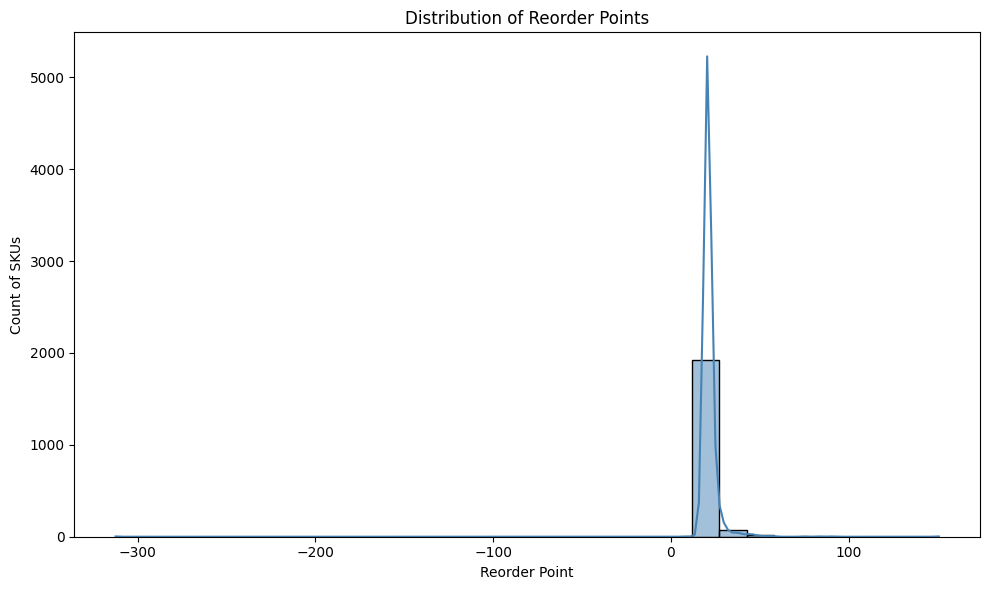

In [41]:
plt.figure(figsize=(10,6))
sns.histplot(
    sku_summary['ReorderPoint'],
    bins=30,
    kde=True,
    color='steelblue'
)
plt.title('Distribution of Reorder Points')
plt.xlabel('Reorder Point')
plt.ylabel('Count of SKUs')
plt.tight_layout()
plt.show()


In [42]:
sku_summary[['StockCode', 'TotalSales', 'ABC', 'TurnoverRate', 'ReorderPoint']].head(10)


,StockCode,TotalSales,ABC,TurnoverRate,ReorderPoint
0,22423,7717.95,A,2.0,43.857534
1,84029E,3186.63,A,2.0,51.797260
2,DOT,2938.74,A,2.0,20.230137
3,79321,2749.78,A,2.0,43.090411
4,85123A,2600.98,A,2.0,57.358904
5,22086,2406.87,A,2.0,45.967123
6,21137,2159.79,A,2.0,44.432877
7,22752,2005.96,A,2.0,29.780822
8,21915,1817.82,A,2.0,83.671233
9,22910,1541.97,A,2.0,39.983562


/tmp/ipython-input-43-329157471.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


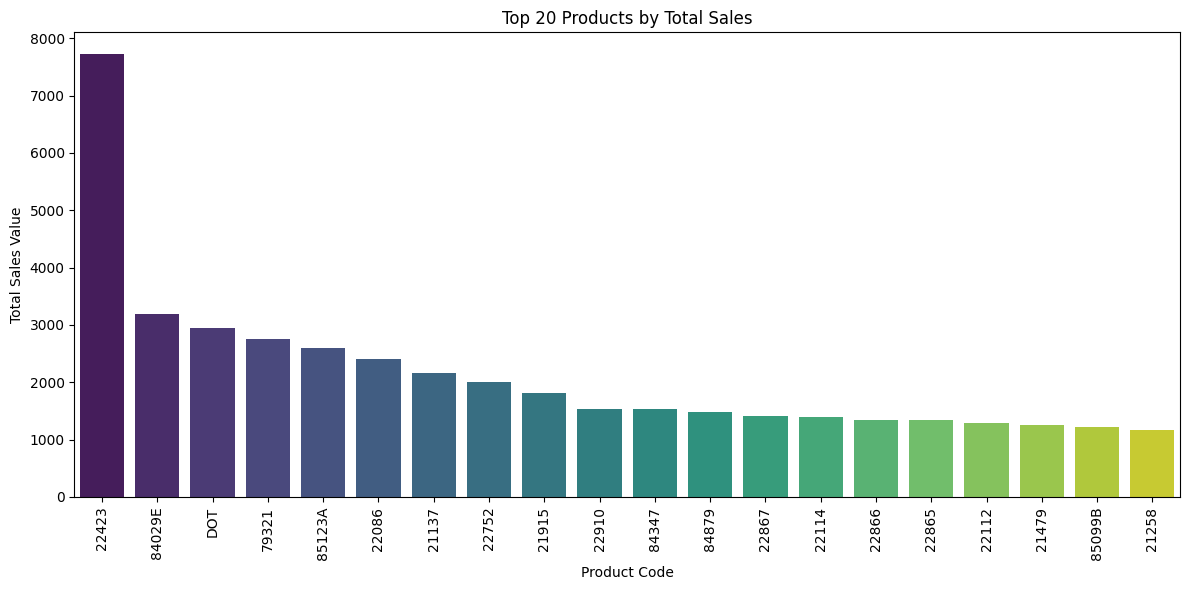

In [43]:
# Example saving Pareto chart
plt.figure(figsize=(12,6))
sns.barplot(
    x='StockCode',
    y='TotalSales',
    data=top_skus,
    palette='viridis'
)
plt.title('Top 20 Products by Total Sales')
plt.xlabel('Product Code')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('pareto_chart.png')


In [45]:
plt.savefig('pareto_chart.png')  # Save the chart
from google.colab import files
files.download('pareto_chart.png')  # Download it to your system


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [46]:
# First, install openpyxl to support Excel export
!pip install openpyxl

# Save as Excel
sku_summary.to_excel('Inventory_Summary.xlsx', index=False)

# Download
from google.colab import files
files.download('Inventory_Summary.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import seaborn as sns

pdf = PdfPages("SupplyChain_Report.pdf")

# Chart 1: Top 20 Products by Total Sales
plt.figure(figsize=(12,6))
sns.barplot(x='StockCode', y='TotalSales', data=sku_summary.sort_values('TotalSales', ascending=False).head(20), palette='viridis')
plt.title('Top 20 Products by Total Sales')
plt.xticks(rotation=90)
pdf.savefig()
plt.close()

# Chart 2: Turnover Rate Distribution
plt.figure(figsize=(10,6))
sns.histplot(sku_summary['TurnoverRate'], bins=30, kde=True, color='coral')
plt.title('Turnover Rate Distribution')
pdf.savefig()
plt.close()

# Chart 3: Reorder Point Distribution
plt.figure(figsize=(10,6))
sns.histplot(sku_summary['ReorderPoint'], bins=30, kde=True, color='steelblue')
plt.title('Distribution of Reorder Points')
pdf.savefig()
plt.close()

# Save PDF
pdf.close()

# Download
files.download('SupplyChain_Report.pdf')


/tmp/ipython-input-47-2944639103.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='StockCode', y='TotalSales', data=sku_summary.sort_values('TotalSales', ascending=False).head(20), palette='viridis')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
!pip install prophet


In [49]:
import pandas as pd

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create TotalSales column
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Extract Month
df['Month'] = df['InvoiceDate'].dt.to_period('M')

# Group by Month and SKU
monthly_sales = df.groupby(['Month', 'StockCode'])['TotalSales'].sum().reset_index()

# Convert Month back to datetime (required for Prophet)
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

monthly_sales.head()


,Month,StockCode,TotalSales
0,2010-12-01,10002,65.17
1,2010-12-01,10120,0.63
2,2010-12-01,10125,1.70
3,2010-12-01,10133,9.31
4,2010-12-01,10135,31.27


In [50]:
sku_code = '85123A'
sku_data = monthly_sales[monthly_sales['StockCode'] == sku_code][['Month', 'TotalSales']]

# Rename columns as Prophet expects: ds and y
sku_data = sku_data.rename(columns={'Month': 'ds', 'TotalSales': 'y'})

sku_data.head()


,ds,y
1885,2010-12-01,2600.98


In [52]:
sku_data.shape


(1, 2)

In [53]:
print(sku_data)


             ds        y
1885 2010-12-01  2600.98


In [54]:
sku_counts = monthly_sales.groupby('StockCode').size().reset_index(name='num_months')
sku_counts = sku_counts.sort_values('num_months', ascending=False)

print(sku_counts.head(10))


     StockCode  num_months
2014      POST           1
0        10002           1
1        10120           1
2        10125           1
3        10133           1
4        10135           1
5        11001           1
6        15034           1
7        15036           1
8        15039           1


In [55]:
sku_code = '85123A'


In [56]:
sku_data = monthly_sales[monthly_sales['StockCode'] == sku_code][['Month', 'TotalSales']]
sku_data = sku_data.rename(columns={'Month': 'ds', 'TotalSales': 'y'})


In [57]:
print(sku_data)


             ds        y
1885 2010-12-01  2600.98


In [62]:
# Recompute monthly sales
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
df['Month'] = df['InvoiceDate'].dt.to_period('M')

monthly_sales = df.groupby(['Month', 'StockCode'])['TotalSales'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

# Count months per SKU
sku_counts = monthly_sales.groupby('StockCode').size().reset_index(name='num_months')
sku_counts = sku_counts.sort_values('num_months', ascending=False)

# Show top SKUs
print(sku_counts.head(10))


     StockCode  num_months
2014      POST           1
0        10002           1
1        10120           1
2        10125           1
3        10133           1
4        10135           1
5        11001           1
6        15034           1
7        15036           1
8        15039           1


In [63]:
sku_code = '85123A'


In [64]:
# Create full monthly date range
all_months = pd.date_range(
    start=monthly_sales['Month'].min(),
    end=monthly_sales['Month'].max(),
    freq='MS'  # Month Start
)

# Filter SKU data
sku_data = monthly_sales[monthly_sales['StockCode'] == sku_code][['Month', 'TotalSales']]

# Reindex to include all months
sku_data = sku_data.set_index('Month').reindex(all_months, fill_value=0).reset_index()
sku_data = sku_data.rename(columns={'index': 'ds', 'TotalSales': 'y'})

print(sku_data)


          ds        y
0 2010-12-01  2600.98


In [65]:
print(sku_data.shape)


(1, 2)


In [67]:
print(sku_code)


85123A


In [68]:
print(
    monthly_sales[monthly_sales['StockCode'] == sku_code]
)


          Month StockCode  TotalSales
1885 2010-12-01    85123A     2600.98


In [69]:
print(sku_data)


          ds        y
0 2010-12-01  2600.98


In [70]:
sku_counts = monthly_sales.groupby('StockCode').size().reset_index(name='num_months')
sku_counts = sku_counts.sort_values('num_months', ascending=False)

print(sku_counts.head(10))


     StockCode  num_months
2014      POST           1
0        10002           1
1        10120           1
2        10125           1
3        10133           1
4        10135           1
5        11001           1
6        15034           1
7        15036           1
8        15039           1


In [71]:
# Group by Month (ALL SKUs)
total_monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalSales'].sum().reset_index()
total_monthly_sales['InvoiceDate'] = total_monthly_sales['InvoiceDate'].dt.to_timestamp()

# Rename columns
total_monthly_sales = total_monthly_sales.rename(columns={
    'InvoiceDate': 'ds',
    'TotalSales': 'y'
})

print(total_monthly_sales)


          ds          y
0 2010-12-01  179948.55
